# Exploratory Data Analysis on Australian Flights Data

We will explore flights data from 2003-2022 to see yearly trend on flight, airline, and destinations

In [352]:
# Import packages
import pandas as pd
import numpy as np
import plotly.express as px

In [353]:
# Connect data
df = pd.read_csv('/Users/haribudiarto/Documents/Works/Data Works/Australia_Flights.csv')
df.head()

,_id,Month,In_Out,Australian_City,International_City,Airline,Route,Port_Country,Port_Region,Service_Country,Service_Region,Stops,All_Flights,Max_Seats,Year,Month_num
0,1,3-Sep,I,Adelaide,Denpasar,Garuda Indonesia,DPS-ADL-MEL,Indonesia,SE Asia,Indonesia,SE Asia,0,13,3809,2003,9
1,2,3-Sep,I,Adelaide,Hong Kong,Cathay Pacific Airways,HKG-ADL-MEL,Hong Kong (SAR),NE Asia,Hong Kong (SAR),NE Asia,0,8,2008,2003,9
2,3,3-Sep,I,Adelaide,Kuala Lumpur,Malaysia Airlines,KUL-ADL,Malaysia,SE Asia,Malaysia,SE Asia,0,17,4726,2003,9
3,4,3-Sep,I,Adelaide,Singapore,Qantas Airways,SIN-DRW-ADL-MEL,Singapore,SE Asia,Singapore,SE Asia,1,4,908,2003,9
4,5,3-Sep,I,Adelaide,Singapore,Qantas Airways,SIN-DRW-ADL-SYD,Singapore,SE Asia,Singapore,SE Asia,1,9,2038,2003,9


In [354]:
# Convert column names to lower
df.columns = df.columns.str.lower()
df.head()

,_id,month,in_out,australian_city,international_city,airline,route,port_country,port_region,service_country,service_region,stops,all_flights,max_seats,year,month_num
0,1,3-Sep,I,Adelaide,Denpasar,Garuda Indonesia,DPS-ADL-MEL,Indonesia,SE Asia,Indonesia,SE Asia,0,13,3809,2003,9
1,2,3-Sep,I,Adelaide,Hong Kong,Cathay Pacific Airways,HKG-ADL-MEL,Hong Kong (SAR),NE Asia,Hong Kong (SAR),NE Asia,0,8,2008,2003,9
2,3,3-Sep,I,Adelaide,Kuala Lumpur,Malaysia Airlines,KUL-ADL,Malaysia,SE Asia,Malaysia,SE Asia,0,17,4726,2003,9
3,4,3-Sep,I,Adelaide,Singapore,Qantas Airways,SIN-DRW-ADL-MEL,Singapore,SE Asia,Singapore,SE Asia,1,4,908,2003,9
4,5,3-Sep,I,Adelaide,Singapore,Qantas Airways,SIN-DRW-ADL-SYD,Singapore,SE Asia,Singapore,SE Asia,1,9,2038,2003,9


In [348]:
# Check numerical data cleanliness
df.describe()

,_id,stops,all_flights,max_seats,year,month_num
count,110055.000000,110055.000000,110055.000000,110055.000000,110055.000000,110055.000000
mean,55028.000000,0.162464,24.775367,6610.760910,2012.726573,6.511762
std,31770.286275,0.388295,21.450937,6197.412623,4.817944,3.472462
min,1.000000,0.000000,0.000000,0.000000,2003.000000,1.000000
25%,27514.500000,0.000000,12.000000,2461.000000,2009.000000,3.000000
50%,55028.000000,0.000000,21.000000,4928.000000,2013.000000,6.000000
75%,82541.500000,0.000000,31.000000,9018.000000,2017.000000,9.000000
max,110055.000000,3.000000,178.000000,52596.000000,2022.000000,12.000000


In [355]:
# Check categorical data cleanliness to see any error/typo in categorization
df_cat = df.select_dtypes(exclude=['int', 'float'])
for col in df_cat.columns:
    print(df_cat[col].unique()) # to print categories name only
    print(df_cat[col].value_counts()) # to print count of every category

['3-Sep' '3-Dec' '4-Mar' '4-Jun' '4-Sep' '4-Dec' '5-Mar' '5-Jun' '5-Sep'
 '5-Dec' '6-Jan' '6-Feb' '6-Mar' '6-Apr' '6-May' '6-Jun' '6-Jul' '6-Aug'
 '6-Sep' '6-Oct' '6-Nov' '6-Dec' '7-Jan' '7-Feb' '7-Mar' '7-Apr' '7-May'
 '7-Jun' '7-Jul' '7-Aug' '7-Sep' '7-Oct' '7-Nov' '7-Dec' '8-Jan' '8-Feb'
 '8-Mar' '8-Apr' '8-May' '8-Jun' '8-Jul' '8-Aug' '8-Sep' '8-Oct' '8-Nov'
 '8-Dec' '9-Jan' '9-Feb' '9-Mar' '9-Apr' '9-May' '9-Jun' '9-Jul' '9-Aug'
 '9-Sep' '9-Oct' '9-Nov' '9-Dec' '10-Jan' '10-Feb' '10-Mar' '10-Apr'
 '10-May' '10-Jun' '10-Jul' '10-Aug' '10-Sep' '10-Oct' '10-Nov' '10-Dec'
 '11-Jan' '11-Feb' '11-Mar' '11-Apr' '11-May' '11-Jun' '11-Jul' '11-Aug'
 '11-Sep' '11-Oct' '11-Nov' '11-Dec' '12-Jan' '12-Feb' '12-Mar' '12-Apr'
 '12-May' '12-Jun' '12-Jul' '12-Aug' '12-Sep' '12-Oct' '12-Nov' '12-Dec'
 '13-Jan' '13-Feb' '13-Mar' '13-Apr' '13-May' '13-Jun' '13-Jul' '13-Aug'
 '13-Sep' '13-Oct' '13-Nov' '13-Dec' '14-Jan' '14-Feb' '14-Mar' '14-Apr'
 '14-May' '14-Jun' '14-Jul' '14-Aug' '14-Sep' '14-Oct' 

In [357]:
# Grouping Flights by In_Out and Year Trend
df_temp1 = df.groupby(by=['year','in_out'],as_index=False)['all_flights'].sum()
df_temp1.head()

,year,in_out,all_flights
0,2003,I,10255
1,2003,O,10199
2,2004,I,22718
3,2004,O,22603
4,2005,I,24075


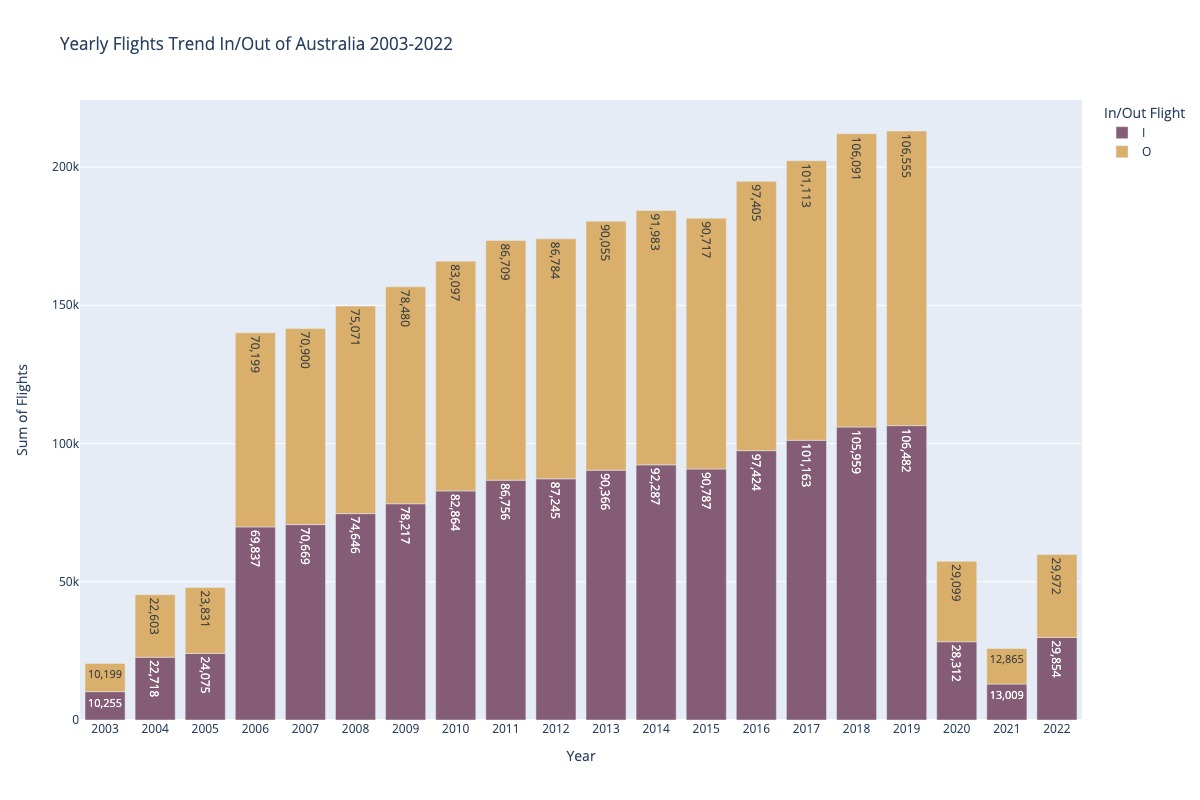

In [401]:
# Visualizing Flights by In_Out and Year
fig = px.bar(df_temp1, x = 'year', y = 'all_flights', color = 'in_out', text = 'all_flights',
             color_discrete_sequence=px.colors.qualitative.Antique,title = "Yearly Flights Trend In/Out of Australia 2003-2022",barmode="relative")
fig.update_xaxes(type='category',title='Year')
fig.update_yaxes(title='Sum of Flights')
fig.update_traces(texttemplate='%{text:,.0f}')
fig.update_layout(legend_title_text='In/Out Flight')
fig.show('jpg',width=1200,height=800)

TAKEAWAYS:
- Total flights always increase every year except in year 2015, 2020, and 2021
- Most increased happen in 2006 with 2.9x increased from 2005
- Most decreased happen in 2020 with 73% decreased from 2019

In [360]:
# Find Top 9 Airlines with most flights 
df_temp2 = (df
            .groupby(by=['airline'],as_index=False)['all_flights'].sum()
            .sort_values('all_flights',ascending=False))
df_temp2.head(9)


,airline,all_flights
63,Qantas Airways,522252
9,Air New Zealand,237272
49,Jetstar,224210
87,Virgin Australia,199151
35,Emirates,186798
72,Singapore Airlines,182351
26,Cathay Pacific Airways,117241
55,Malaysia Airlines,80876
78,Thai Airways International,64740


In [366]:
# Filtering Top 9 Airlines and Grouping by Year and Airlines
df_temp3 = (df
            .groupby(by=['year','airline'],as_index=False)['all_flights'].sum()
            .sort_values(by=['year','all_flights'],ascending=[True,False]))
df_temp3 = df_temp3[df_temp3['airline'].isin(['Qantas Airways','Jetstar','Virgin Australia','Air New Zealand','Emairates','Cathay Pacific Airways','Garuda Indonesia','Malaysia Airlines','Singapore Airlines'])]
df_temp3.head(9)

,year,airline,all_flights
32,2003,Qantas Airways,5959
5,2003,Air New Zealand,1960
35,2003,Singapore Airlines,1228
27,2003,Malaysia Airlines,886
12,2003,Cathay Pacific Airways,666
21,2003,Garuda Indonesia,418
75,2004,Qantas Airways,12850
46,2004,Air New Zealand,4238
78,2004,Singapore Airlines,2536


In [368]:
# Create new variable to compare flight distribution
category_sum = df_temp3.groupby(['year'])['all_flights'].sum().reset_index()
df_temp3 = df_temp3.merge(category_sum, on='year', suffixes=['', '_sum'])
df_temp3['percentage_flg'] = df_temp3['all_flights'] / df_temp3['all_flights_sum'] * 100
df_temp3 = df_temp3.sort_values(['year','percentage_flg'],ascending=(False))
df_temp3

,year,airline,all_flights,all_flights_sum,percentage_flg
149,2022,Qantas Airways,12428,34983,35.525827
150,2022,Singapore Airlines,7642,34983,21.844896
151,2022,Jetstar,5740,34983,16.407970
152,2022,Air New Zealand,5631,34983,16.096390
153,2022,Malaysia Airlines,1588,34983,4.539348
...,...,...,...,...,...
1,2003,Air New Zealand,1960,11117,17.630656
2,2003,Singapore Airlines,1228,11117,11.046146
3,2003,Malaysia Airlines,886,11117,7.969776
4,2003,Cathay Pacific Airways,666,11117,5.990825


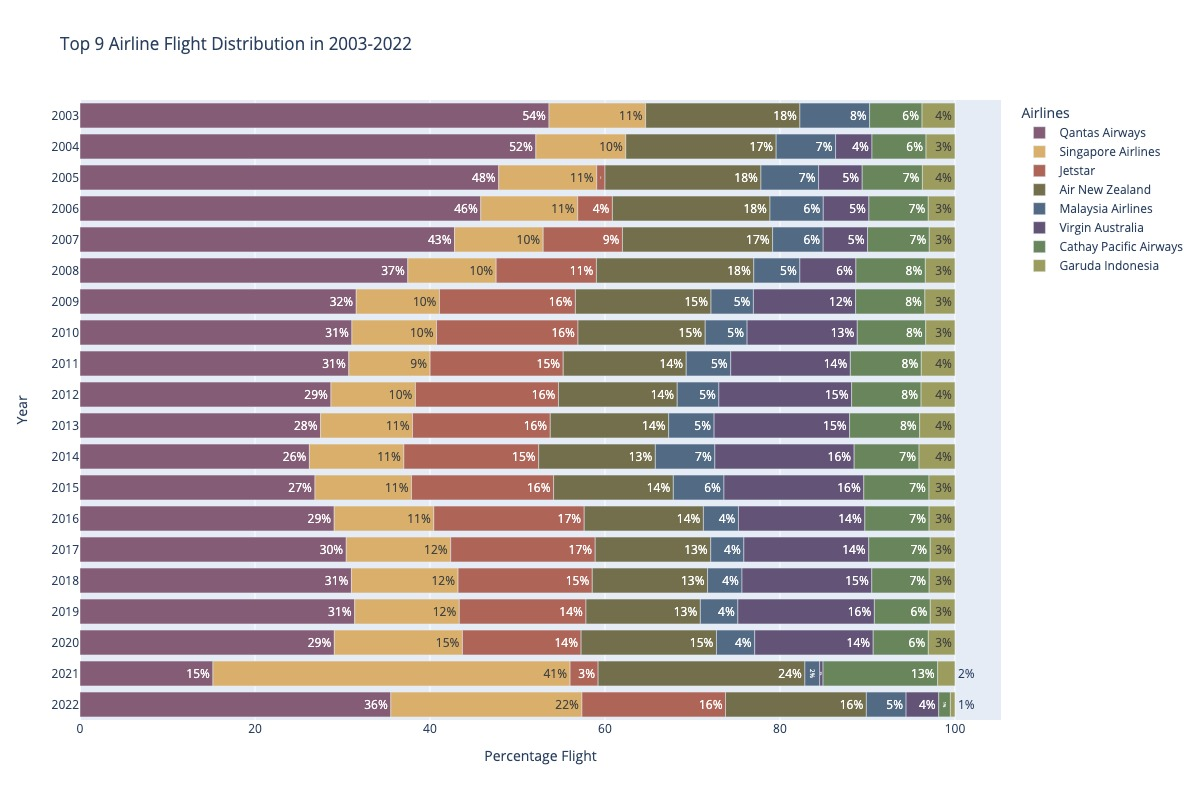

In [400]:
# Visualizing top 9 airline contribution per year
fig = px.bar(df_temp3, y = 'year', x = 'percentage_flg', color = 'airline', orientation = 'h', text = 'percentage_flg', 
             color_discrete_sequence=px.colors.qualitative.Antique,title = "Top 9 Airline Flight Distribution in 2003-2022",barmode="relative")
fig.update_traces(texttemplate='%{text:.0f}%')
fig.update_yaxes(type='category',title='Year')
fig.update_xaxes(title='Percentage Flight')
fig.update_layout(legend_title_text='Airlines')
fig.show('jpg',width=1200,height=800)

TAKEAWAYS:
- On 2003-2020 period, Qantas drop their market share significantly, from 54% in 2003 to 29% in 2020. (We did not see 2021-2022 period due to massive reduction in total flights)
- Jetstar and Virgin Australia is newcomer in 2005 and 2004 and grow their market share into 14% in 2020.
- Singapore Airlines, Air New Zealand, Malaysia Airlines, Cathay Pacific Airways and Garuda Indonesia have relatively same market share on 2003-2020 period.

In [377]:
# Grouping data by Year & Port Region also create variable to compare flight distribution 
df_temp4 = df.groupby(by=['year','port_region'],as_index=False)['all_flights'].sum()

category_sum = df_temp4.groupby(['year'])['all_flights'].sum().reset_index()
df_temp4 = df_temp4.merge(category_sum, on='year', suffixes=['', '_sum'])
df_temp4['percentage_flg'] = df_temp4['all_flights'] / df_temp4['all_flights_sum'] * 100
df_temp4 = df_temp4.sort_values(['year','percentage_flg'],ascending=(False))
df_temp4

,year,port_region,all_flights,all_flights_sum,percentage_flg
197,2022,SE Asia,23626,59826,39.491191
194,2022,New Zealand,11173,59826,18.675827
191,2022,Middle East,6051,59826,10.114332
190,2022,Islands,5583,59826,9.332063
192,2022,N America,5455,59826,9.118109
...,...,...,...,...,...
2,2003,Islands,1213,20454,5.930380
1,2003,Europe,1098,20454,5.368143
3,2003,Middle East,490,20454,2.395619
0,2003,Africa,218,20454,1.065806


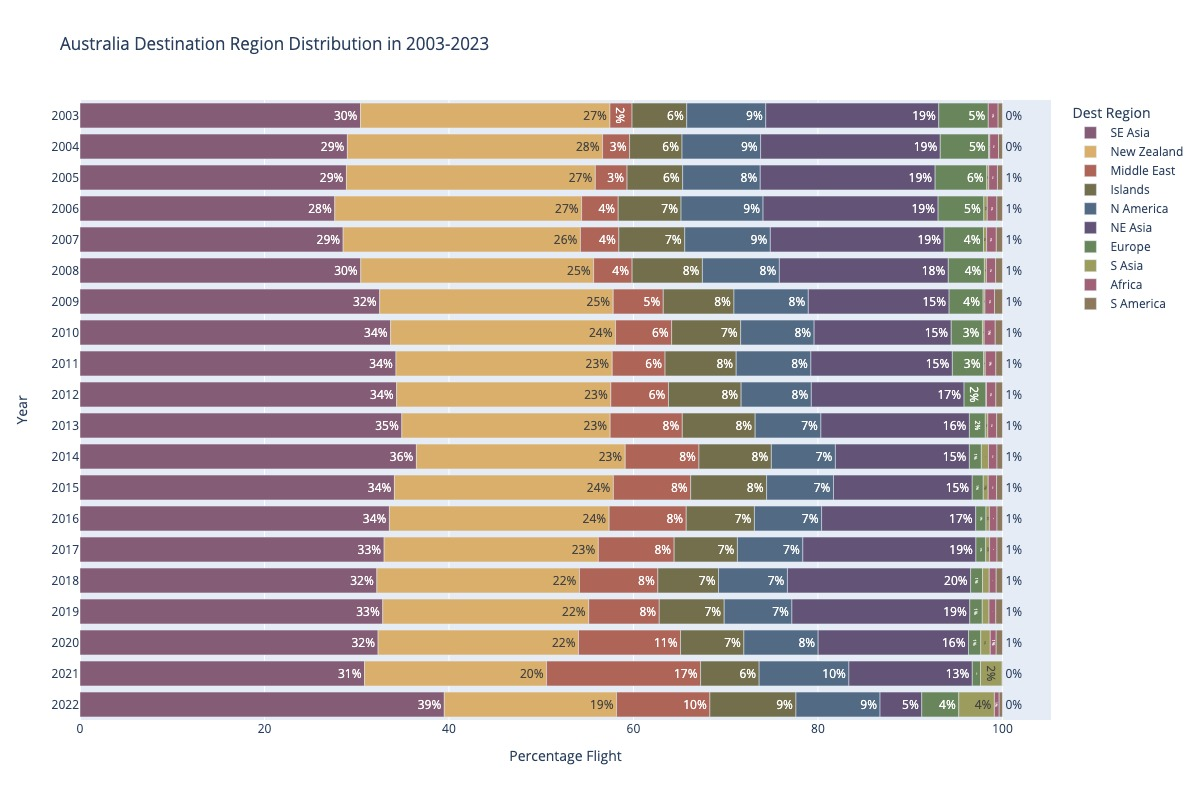

In [402]:
# Visualizing Port Region distribution
fig = px.bar(df_temp4, y = 'year', x = 'percentage_flg', color = 'port_region', orientation = 'h', text = 'percentage_flg', 
             color_discrete_sequence=px.colors.qualitative.Antique,title = "Australia Destination Region Distribution in 2003-2023",barmode="relative")
fig.update_traces(texttemplate='%{text:.0f}%')
fig.update_yaxes(type='category',title='Year')
fig.update_xaxes(title='Percentage Flight')
fig.update_layout(legend_title_text='Dest Region')
fig.show('jpg',width=1200,height=800)

TAKEAWAYS:
- Most percentage share increased region from 2003 are South East Asia in 2014 (30% to 36%) and Middle East in 2020 (2% to 11%). (We did not see 2021-2022 period due to massive reduction in total flights)
- Europe and New Zealand are region with most decreased from 2003-2020. 

In [381]:
# Prepare data for sankey chart for Sydney,Melbourne,Brisbane,Perth to Region Outside Australia in 2019
df_temp5 = df[df['australian_city'].isin(['Sydney','Melbourne','Brisbane','Perth'])]
df_temp5 = df_temp5[df_temp5['year'] == 2019]
df_temp5 = (df_temp5
                .groupby(by=['port_region','australian_city'],as_index=False)['all_flights'].sum()
                .reindex(columns=['australian_city','port_region','all_flights'])
                .sort_values('all_flights',ascending=False))
df_temp5.head()

,australian_city,port_region,all_flights
18,Sydney,NE Asia,19116
22,Sydney,New Zealand,19049
28,Melbourne,SE Asia,18887
30,Sydney,SE Asia,18867
29,Perth,SE Asia,15832


In [382]:
# Code the dataframe to match sankey needs
df_temp5.columns = ['source', 'target', 'value']
unique_source_target = list(pd.unique(df_temp5[['source', 'target']].values.ravel('K')))
mapping_dict = {k: v for v, k in enumerate(unique_source_target)}
df_temp5['source'] = df_temp5['source'].map(mapping_dict)
df_temp5['target'] = df_temp5['target'].map(mapping_dict)
df_temp5_dict = df_temp5.to_dict(orient='list')
df_temp5.head()

,source,target,value
18,0,4,19116
22,0,5,19049
28,1,6,18887
30,0,6,18867
29,2,6,15832


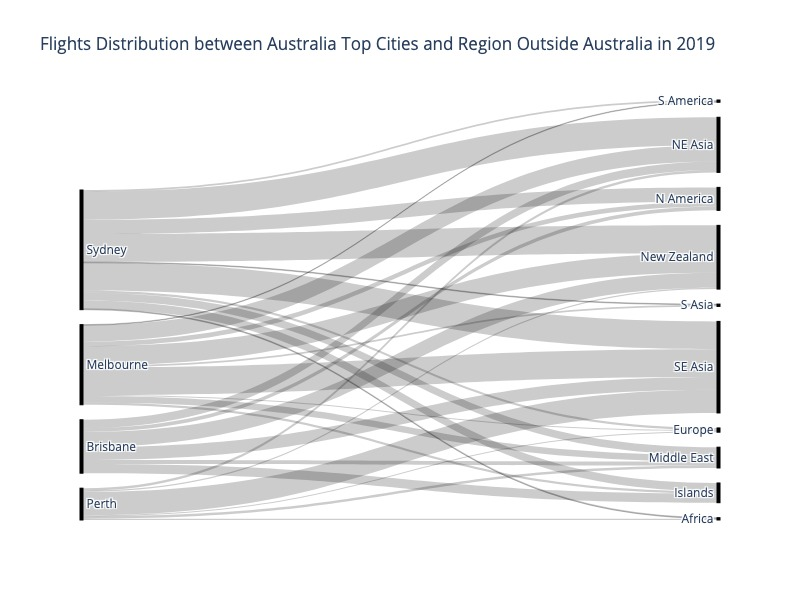

In [405]:
# Visualizing Sankey Chart to see how the distribution from Australia Top Cities into Destination Region
import plotly.graph_objects as go
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 3,
      line = dict(color = "black", width = 1),
      label = unique_source_target,
      color = "black"
    ),
    link = dict(
      source = df_temp5_dict["source"],
      target = df_temp5_dict["target"],
      value = df_temp5_dict["value"]
  ))])
fig.update_layout(title='Flights Distribution between Australia Top Cities and Region Outside Australia in 2019')
fig.show('jpg',width=800,height=600)

TAKEAWAYS:
- Sydney has the most flights between Australian Cities, while South East Asia has the most flights between Destination Region
- North East Asia and New Zealand has most flight to/from Sydney